In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score



In [2]:
df=pd.read_csv('appliance_energy.csv')
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [3]:
print(df.tail())


    Temperature (°C)  Energy Consumption (kWh)
95         24.875912                  2.079686
96         25.454657                  2.506915
97         23.550820                  2.525658
98         15.508383                  1.689184
99         17.157829                  2.129374


In [5]:
print(df.describe)


<bound method NDFrame.describe of     Temperature (°C)  Energy Consumption (kWh)
0          22.490802                  2.292604
1          34.014286                  3.251925
2          29.639879                  3.009868
3          26.973170                  1.703533
4          18.120373                  1.702201
..               ...                       ...
95         24.875912                  2.079686
96         25.454657                  2.506915
97         23.550820                  2.525658
98         15.508383                  1.689184
99         17.157829                  2.129374

[100 rows x 2 columns]>


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          100 non-null    float64
 1   Energy Consumption (kWh)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


In [7]:
df.shape


(100, 2)

In [11]:
x=df[['Temperature (°C)']]
y=df['Energy Consumption (kWh)']

In [12]:
x

,Temperature (°C)
0,22.490802
1,34.014286
2,29.639879
3,26.973170
4,18.120373
...,...
95,24.875912
96,25.454657
97,23.550820
98,15.508383


In [13]:
y

0     2.292604
1     3.251925
2     3.009868
3     1.703533
4     1.702201
        ...   
95    2.079686
96    2.506915
97    2.525658
98    1.689184
99    2.129374
Name: Energy Consumption (kWh), Length: 100, dtype: float64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train

,Temperature (°C)
55,33.437485
88,32.744255
26,18.993476
42,15.687770
69,34.737739
...,...
60,22.773546
71,18.974314
14,18.636499
92,30.215701


In [20]:
y_train

55    3.378030
88    3.756114
26    1.727990
42    2.140188
69    3.864685
        ...   
60    1.885728
71    1.237203
14    1.912189
92    2.898876
51    2.767117
Name: Energy Consumption (kWh), Length: 80, dtype: float64

In [21]:
x_test

,Temperature (°C)
83,16.271167
53,32.896547
70,30.444895
45,28.250446
44,20.175600
39,23.803050
22,20.842893
80,32.262069
10,15.411690
0,22.490802


In [22]:
y_test

83    1.955394
53    3.037917
70    2.426014
45    2.370351
44    2.413076
39    2.531079
22    2.086846
80    4.159094
10    1.998870
0     2.292604
18    2.167836
30    3.658183
73    3.279415
33    3.360548
90    2.150219
4     1.702201
76    2.702528
77    1.764216
12    2.900005
31    1.928337
Name: Energy Consumption (kWh), dtype: float64

In [23]:
x_train.shape

(80, 1)

In [24]:
y_train.shape

(80,)

In [25]:
y_test.shape

(20,)

In [26]:
x_test.shape

(20, 1)

In [27]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(x_test)

In [29]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

### Mean Squared Error

In [31]:
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse}")
r2=r2_score(y_test,y_pred)
print(f"R-Squared : {r2}")

Mean Squared Error : 0.16342487842925058
R-Squared : 0.6119478445218713


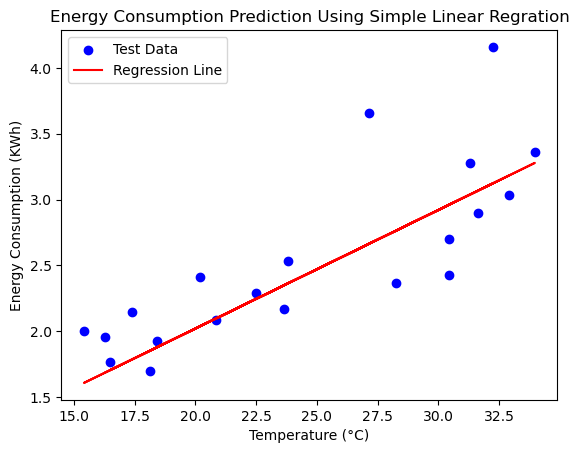

In [34]:
plt.scatter(x_test,y_test,color='blue',label='Test Data')
plt.plot(x_test,y_pred,color='red',label='Regression Line')
plt.xlabel("Temperature (°C)")
plt.ylabel('Energy Consumption (KWh)')
plt.legend()
plt.title('Energy Consumption Prediction Using Simple Linear Regration')
plt.show()

            

In [35]:
import joblib
joblib.dump(model,'appliance_energy_model.pkl')


['appliance_energy_model.pkl']